Подключение библиотек

In [122]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6  # меняем размер графиков по умолчанию

plt.figure(figsize = (14, 14))

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

In [123]:
TEST_PATH = 'test.csv'
TRAIN_PATH = 'train.csv'
SS_PATH = 'sample_submission.csv'

##  Описание датасета

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms* - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

**Анализ данных**

In [124]:
test_data = pd.read_csv(TEST_PATH)
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [125]:
train_data = pd.read_csv(TRAIN_PATH)
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [126]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [100]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


**Убираем ID**

In [127]:
train_data_id = train_data['Id']
train_data = train_data.drop(['Id'], axis=1)

test_data_id = test_data['Id']
test_data = test_data.drop(['Id'], axis=1)

**Посмотрим на целевую переменную Price**

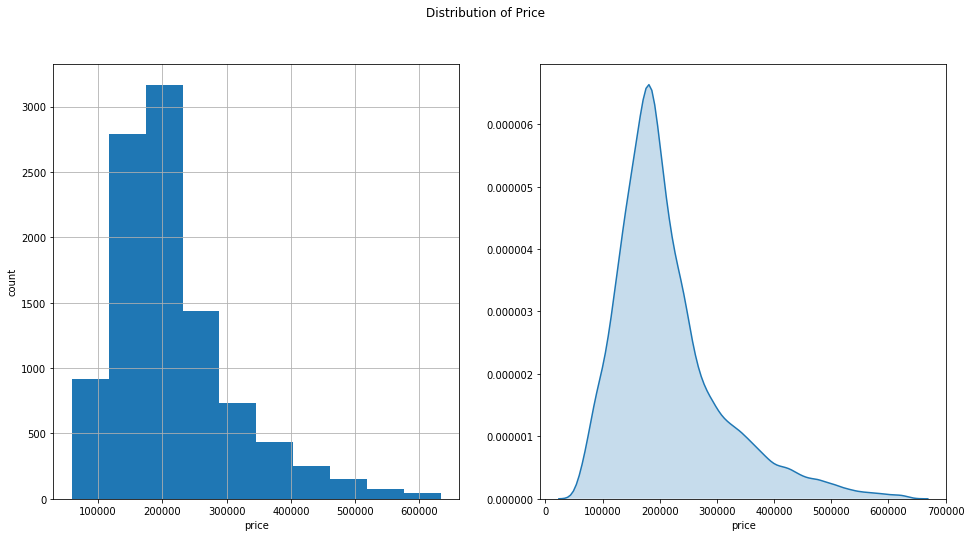

In [128]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_data['Price'].hist()
plt.ylabel('count')
plt.xlabel('price')

plt.subplot(122)
sns.kdeplot(train_data['Price'], shade=True, legend=False)
plt.xlabel('price')

plt.suptitle('Distribution of Price')
plt.show()

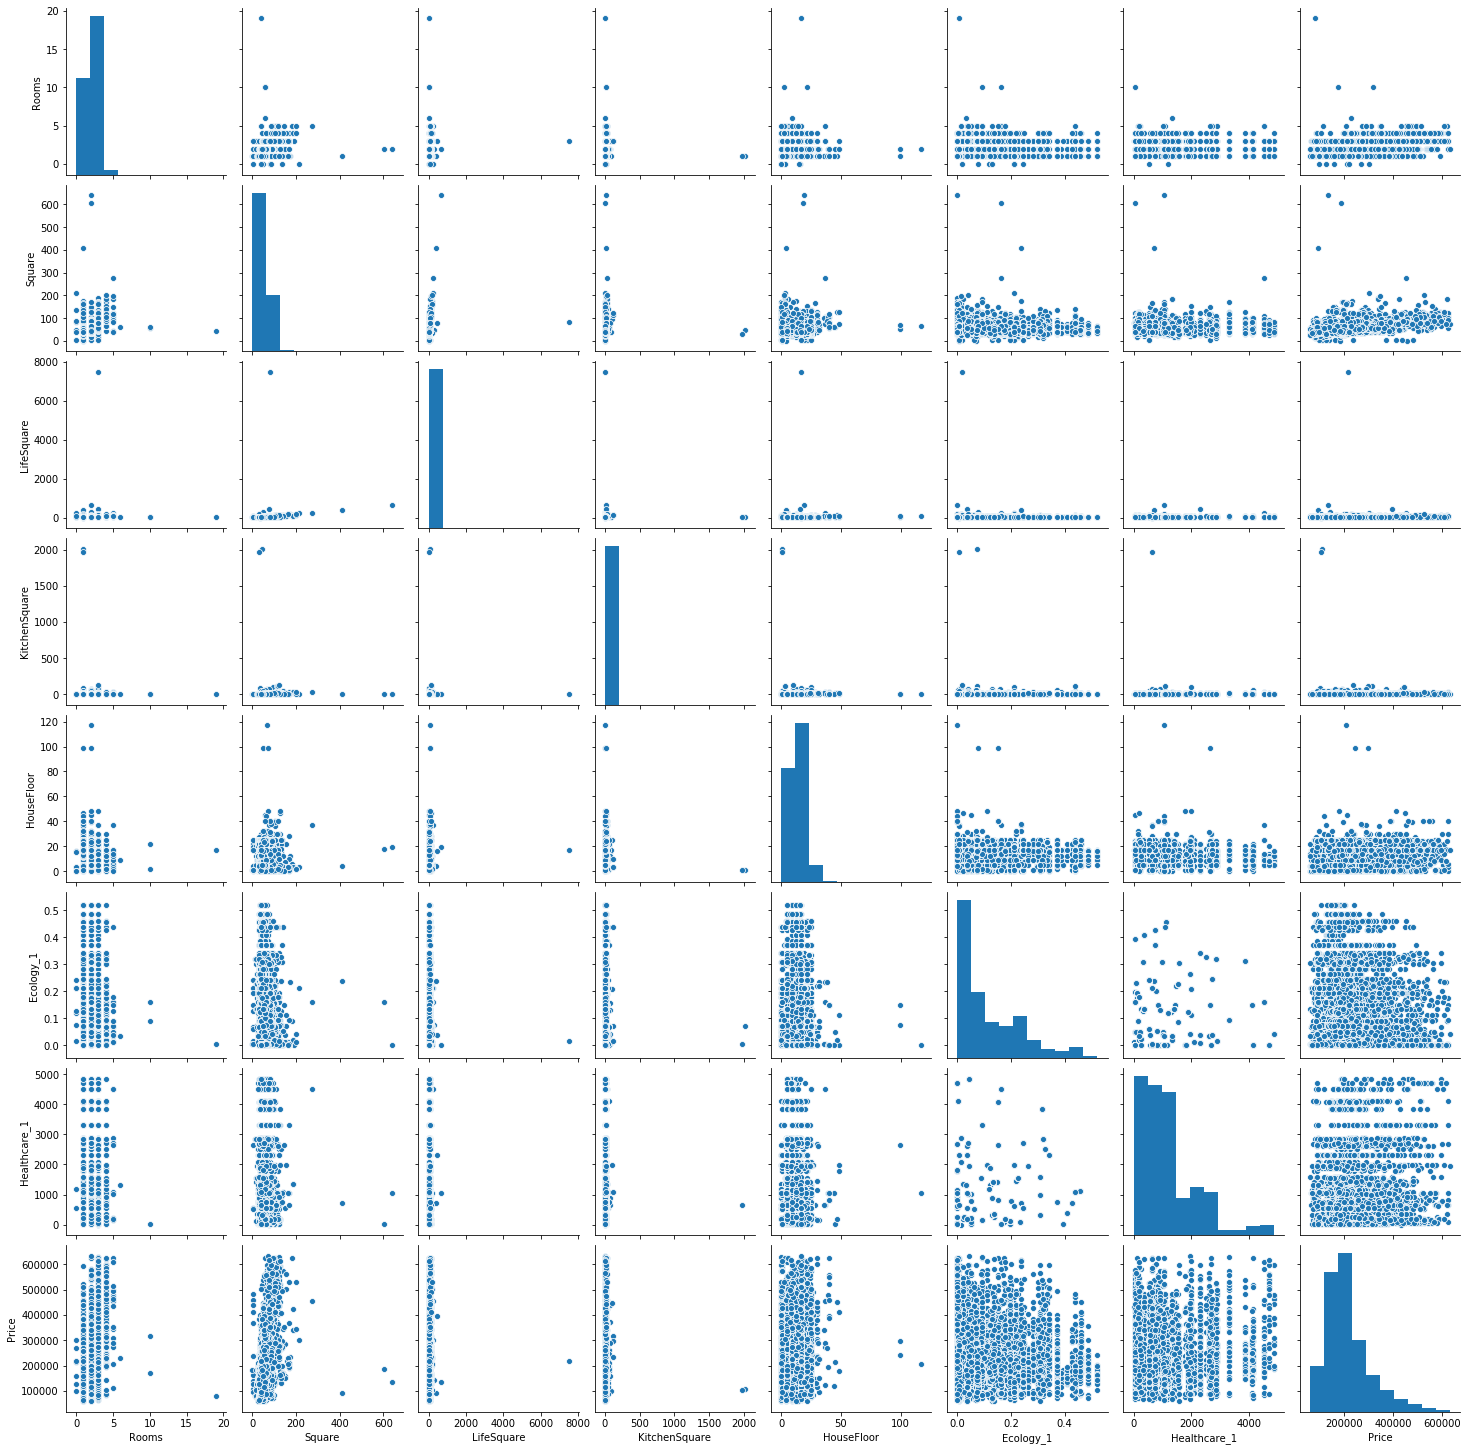

In [129]:
train_data_num_features = train_data.select_dtypes(include='float64')
sns.pairplot(train_data_num_features)

**Поиск и заполнение пропусков**

***Train_data***

In [130]:
train_data.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [131]:
train_data.loc[train_data['Healthcare_1'].isnull(), 'Healthcare_1'] = train_data['Healthcare_1'].median()

In [132]:
train_data.loc[train_data['LifeSquare'].isnull(), 'LifeSquare'] = train_data['LifeSquare'].median()

***Test_data***

In [160]:
test_data.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [161]:
test_data.loc[test_data['Healthcare_1'].isnull(), 'Healthcare_1'] = test_data['Healthcare_1'].median()

In [162]:
test_data.loc[test_data['LifeSquare'].isnull(), 'LifeSquare'] = test_data['LifeSquare'].median()

**Преобразование категориальных признаков "Ecology_2", "Ecology_3", "Shops_2" в бинарные**

***Train_data***

In [133]:
print(train_data['Ecology_2'].value_counts())
print(train_data['Ecology_3'].value_counts())
print(train_data['Shops_2'].value_counts())

B    9903
A      97
Name: Ecology_2, dtype: int64
B    9725
A     275
Name: Ecology_3, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


In [134]:
train_data['Ecology_2'] = train_data['Ecology_2'].replace({'A':0, 'B':1})

In [135]:
train_data['Ecology_3'] = train_data['Ecology_3'].replace({'A':0, 'B':1})

In [136]:
train_data['Shops_2'] = train_data['Shops_2'].replace({'A':0, 'B':1})

***Test_data***

In [164]:
print(test_data['Ecology_2'].value_counts())
print(test_data['Ecology_3'].value_counts())
print(test_data['Shops_2'].value_counts())

B    4952
A      48
Name: Ecology_2, dtype: int64
B    4851
A     149
Name: Ecology_3, dtype: int64
B    4588
A     412
Name: Shops_2, dtype: int64


In [165]:
test_data['Ecology_2'] = test_data['Ecology_2'].replace({'A':0, 'B':1})

In [166]:
test_data['Ecology_3'] = test_data['Ecology_3'].replace({'A':0, 'B':1})

In [167]:
test_data['Shops_2'] = test_data['Shops_2'].replace({'A':0, 'B':1})

**Выявление несоответствий и приведение в норму**

***Train_data***

In [137]:
train_data[train_data['Rooms'] <= 0]
train_data.loc[train_data['Rooms'] == 0, 'Rooms'] = train_data['Rooms'].median()

***Test_data***

In [168]:
test_data.loc[test_data['Rooms'] == 0, 'Rooms'] = test_data['Rooms'].median()

***Train_data***

In [138]:
train_data[train_data['Square'] <= 12]
train_data.loc[train_data['Square'] <= 12, 'Square'] = train_data['Square'].median()

***Test_data***

In [169]:
test_data.loc[test_data['Square'] <= 12, 'Square'] = test_data['Square'].median()

***Train_data***

In [140]:
train_data[train_data['LifeSquare'] <= 10]
train_data.loc[train_data['LifeSquare'] <= 10, 'LifeSquare'] = train_data['LifeSquare'].median()
train_data.loc[train_data['LifeSquare'] >= 250, 'LifeSquare'] = train_data['LifeSquare'].median()

***Test_data***

In [170]:
test_data.loc[test_data['LifeSquare'] <= 10, 'LifeSquare'] = test_data['LifeSquare'].median()
test_data.loc[test_data['LifeSquare'] >= 250, 'LifeSquare'] = test_data['LifeSquare'].median()

***Train_data***

In [141]:
train_data[train_data['LifeSquare'] >= train_data['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,1,1,0,168,0,900.0,0,0,1,95338.198549
44,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,1,1,15,2787,2,520.0,0,7,1,435462.048070
52,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,1,1,1,264,0,900.0,0,1,1,199215.452229
123,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,1,1,53,13670,4,900.0,1,11,1,309688.592681
153,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,1,1,2,629,1,900.0,0,0,0,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,1,1,1,388,0,900.0,0,0,1,88150.012510
9895,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,1,1,2,469,0,900.0,0,0,1,234194.837047
9902,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,1,1,37,6856,84,1940.0,2,5,1,381937.404161
9910,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,1,1,53,14892,4,900.0,1,4,1,528560.506016


In [142]:
train_data.loc[(train_data['Square'] < train_data['LifeSquare']), 'Square'] = train_data.loc[(train_data['Square'] < train_data['LifeSquare']), 'LifeSquare']

In [143]:
train_data.loc[train_data['Square'] >= 300, 'Square'] = train_data['Square'].median()

56.331415036267494

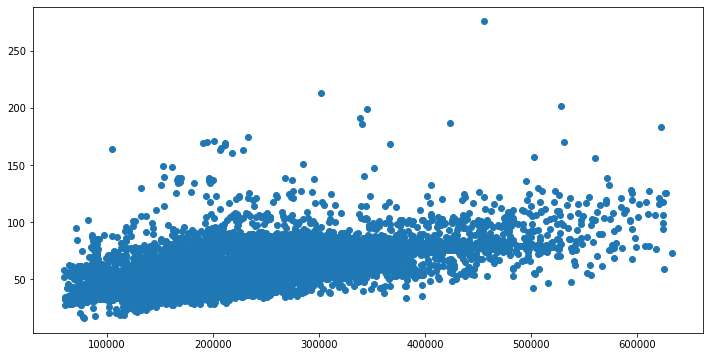

In [144]:
plt.scatter(train_data['Price'], train_data['Square'])
train_data['Square'].mean()

35.95753062550952

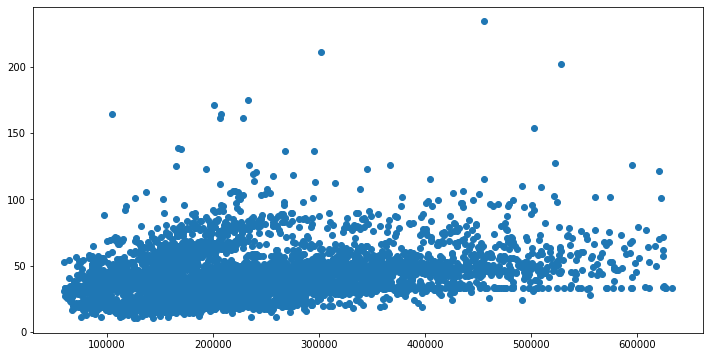

In [145]:
plt.scatter(train_data['Price'], train_data['LifeSquare'])
train_data['LifeSquare'].mean()

***Test_data***

In [172]:
test_data[test_data['LifeSquare'] >= test_data['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
27,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1
39,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,1,1,4,915,0,900.0,0,0,1
43,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,1,1,1,264,0,900.0,0,1,1
70,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,1,1,22,6398,141,1046.0,3,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,1,3.0,77.229885,79.958685,1.0,18,17.0,1977,0.007122,1,1,1,264,0,900.0,0,1,1
4951,94,1.0,41.281057,42.392594,10.0,13,13.0,2014,0.282798,1,1,33,8667,2,900.0,0,6,1
4962,94,1.0,33.680382,34.198977,1.0,10,9.0,1972,0.127376,1,1,43,8429,3,900.0,3,9,1
4969,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,1,1,35,7715,4,990.0,0,6,1


In [173]:
test_data.loc[(test_data['Square'] < test_data['LifeSquare']), 'Square'] = test_data.loc[(test_data['Square'] < test_data['LifeSquare']), 'LifeSquare']

In [174]:
test_data.loc[test_data['Square'] >= 300, 'Square'] = test_data['Square'].median()

***Train_data***

In [146]:
train_data.loc[train_data['KitchenSquare'] > train_data['Square']][:]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,1,1,2,629,1,900.0,0,0,0,108337.484207
5149,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,1,1,21,5731,0,900.0,1,0,1,160488.033165
7088,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,1,1,4,915,0,900.0,0,0,1,99079.960518
8584,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,1,1,30,5285,0,645.0,6,6,1,105539.556275


In [147]:
train_data.loc[train_data['KitchenSquare'] >= train_data['Square'], 'KitchenSquare'] = train_data['KitchenSquare'].median()

5.8616

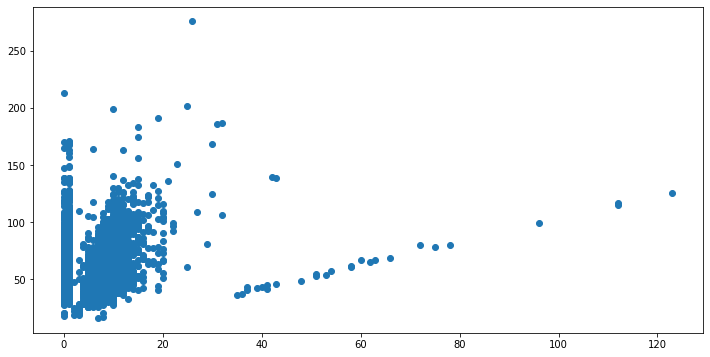

In [148]:
plt.scatter(train_data['KitchenSquare'], train_data['Square'])
train_data['KitchenSquare'].mean()

***Test_data***

In [176]:
test_data.loc[test_data['KitchenSquare'] > test_data['Square']][:]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1964,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,1,1,28,6533,1,1015.0,2,5,1
2424,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,1,1,31,6119,4,900.0,1,2,1
3863,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,1,1,10,2277,2,1547.0,0,0,1
4555,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,1,1,5,1564,0,540.0,0,0,1


In [177]:
test_data.loc[test_data['KitchenSquare'] >= test_data['Square'], 'KitchenSquare'] = test_data['KitchenSquare'].median()

***Train_data***

In [149]:
train_data['Rooms'].value_counts()

2.0     3888
1.0     3705
3.0     2235
4.0      150
5.0       18
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [150]:
train_data.loc[train_data['Rooms'] >= 6, 'Rooms'] = train_data['Rooms'].median()

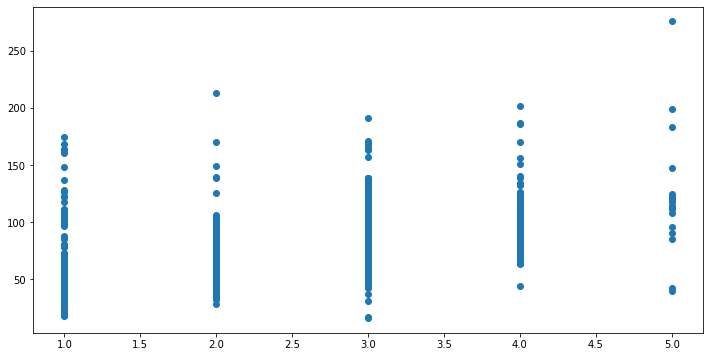

In [151]:
plt.scatter(train_data['Rooms'], train_data['Square'])

***Test_data***

In [178]:
test_data['Rooms'].value_counts()

2.0     2032
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [179]:
test_data.loc[test_data['Rooms'] >= 6, 'Rooms'] = test_data['Rooms'].median()

***Train_data***

In [152]:
train_data[train_data['HouseFloor'] <= train_data['Floor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,221244.156664
14,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,1,1,2,629,1,900.0,0,0,0,140647.565937
16,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,1,1,5,1227,0,900.0,0,0,1,117000.381287
21,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,1,1,9,1892,0,900.0,0,1,1,127200.026511
23,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,1,1,30,5285,0,645.0,6,6,1,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,1,1,53,14892,4,900.0,1,4,1,441108.911237
9991,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,1,1,37,5288,0,1937.0,3,2,1,212883.501504
9994,23,2.0,64.864198,32.781260,1.0,17,17.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,171323.515653
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040


In [153]:
train_data.loc[(train_data['HouseFloor']==0), 'HouseFloor'] = train_data.loc[(train_data['HouseFloor']==0), 'Floor']

In [154]:
train_data.loc[(train_data['HouseFloor'] < train_data['Floor']), 'HouseFloor'] = train_data.loc[(train_data['HouseFloor'] < train_data['Floor']), 'Floor']

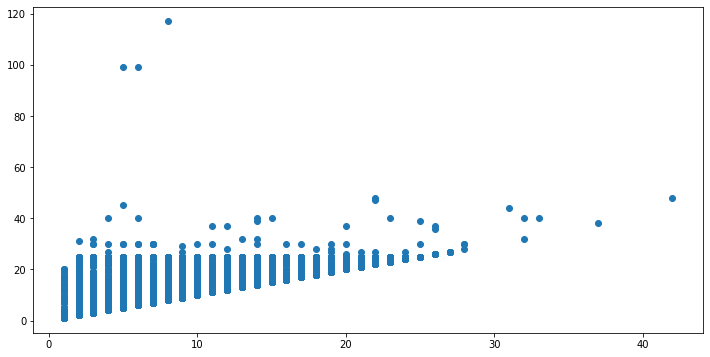

In [155]:
plt.scatter(train_data['Floor'], train_data['HouseFloor'])

***Test_data***

In [180]:
test_data[test_data['HouseFloor'] <= test_data['Floor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0
5,53,1.0,40.675627,32.925087,1.0,21,21.0,1977,0.049637,1,1,34,7759,0,229.0,1,3,1
8,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,1,1,53,14892,4,900.0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,58,1.0,39.768340,22.413943,8.0,10,10.0,2005,0.310199,1,1,11,2748,1,900.0,0,0,1
4989,39,2.0,44.203592,30.191691,6.0,10,9.0,1972,0.428826,1,1,25,5011,8,730.0,0,2,1
4993,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,1,0,30,5048,9,325.0,2,5,1
4997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1,1,74,19083,2,900.0,5,15,1


In [181]:
test_data.loc[(test_data['HouseFloor']==0), 'HouseFloor'] = test_data.loc[(test_data['HouseFloor']==0), 'Floor']

In [182]:
test_data.loc[(test_data['HouseFloor'] < test_data['Floor']), 'HouseFloor'] = test_data.loc[(test_data['HouseFloor'] < test_data['Floor']), 'Floor']

***Train_data***

In [156]:
train_data.loc[(train_data['HouseYear'] > 2020), :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,1,1,30,6141,10,262.0,3,6,1,254084.534396
4189,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,1,1,25,4756,16,2857.0,5,8,1,243028.603096


In [157]:
train_data_HouseYear_mean = train_data.loc[(train_data['HouseYear'] <= 2020), 'HouseYear'].mean()
train_data.loc[(train_data['HouseYear'] > 2020), 'HouseYear'] = train_data_HouseYear_mean

***Test_data***

In [183]:
train_data.loc[(train_data['HouseYear'] > 2020), :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


**Данные после обработки**

In [158]:
train_data.info()
train_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  float64
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Price  

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,209.000000
Rooms,10000.0,1.888400,0.811056,1.000000,1.000000,2.000000,2.000000,5.000000
Square,10000.0,56.331415,19.091244,15.988889,41.887622,52.620871,65.985903,275.645284
LifeSquare,10000.0,35.957531,15.209220,10.523868,27.654813,32.781260,41.410883,233.949309
KitchenSquare,10000.0,5.861600,5.070426,0.000000,1.000000,6.000000,9.000000,123.000000
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,42.000000
HouseFloor,10000.0,13.435700,6.094012,1.000000,9.000000,14.000000,17.000000,117.000000
HouseYear,10000.0,1984.865373,18.409643,1910.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,0.521867
Ecology_2,10000.0,0.990300,0.098015,0.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
test_data.info()
test_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   5000 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   int64  
dtypes: float

,count,mean,std,min,25%,50%,75%,max
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.906200,0.805935,1.000000,1.000000,2.000000,2.000000,5.000000
Square,5000.0,56.626587,18.964078,15.948246,42.047523,52.930550,66.392939,223.453689
LifeSquare,5000.0,36.080601,14.699626,10.692499,27.990919,32.925087,41.760597,169.901701
KitchenSquare,5000.0,5.822800,4.633195,0.000000,1.000000,6.000000,9.000000,112.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,13.395000,6.231945,1.000000,9.000000,14.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867
Ecology_2,5000.0,0.990400,0.097518,0.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
train_data_result = train_data['Price']
train_data_with_price = train_data.loc[:][:]
train_data = train_data.drop(['Price'], axis=1)

In [189]:
train_data_result.head()

0    184966.930730
1    300009.450063
2    220925.908524
3    175616.227217
4    150226.531644
Name: Price, dtype: float64

## Выборки и scale

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data_result, test_size=0.25, random_state=24)

In [191]:
model_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(model_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(model_scaler.transform(X_test), columns=X_test.columns)
test_data_scaled = pd.DataFrame(model_scaler.transform(test_data), columns=test_data.columns)

In [192]:
X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
8745,1,3.0,79.473590,32.781260,1.0,16,17.0,1977.0,0.007122,1,1,1,264,0,900.0,0,1,1
9538,27,1.0,44.517852,16.250381,1.0,12,12.0,2015.0,0.017647,1,1,2,469,0,900.0,0,0,1
2425,39,1.0,34.375007,20.874454,9.0,4,12.0,1971.0,0.428826,1,1,25,5011,8,730.0,0,2,1
8073,1,2.0,80.156081,32.781260,1.0,4,4.0,1977.0,0.007122,1,1,1,264,0,900.0,0,1,1
442,9,1.0,40.575412,23.573299,10.0,24,24.0,1996.0,0.069753,1,1,53,13670,4,900.0,1,11,1


In [193]:
test_data_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,0.174460,0.135139,-0.341275,-0.163783,0.025717,-0.482441,0.091668,-0.702473,1.621660,0.099141,0.165521,-0.776978,-0.646700,-0.297337,-0.174776,-0.882096,-0.878695,0.301248
1,0.541861,0.135139,0.675661,-0.197948,-0.940591,-0.482441,-1.202468,-0.430117,-0.358215,0.099141,0.165521,-1.062067,-0.973214,-0.213904,-0.174776,-0.882096,-0.465049,0.301248
2,3.205515,-1.099382,-2.121880,-1.340381,1.185286,-1.248422,-1.364234,-4.134160,-0.998230,0.099141,0.165521,0.306360,0.546285,3.290264,4.879505,2.477503,0.155421,0.301248
3,-0.078128,0.135139,0.874184,1.081691,0.605501,2.581485,1.385803,1.204019,-0.137832,0.099141,0.165521,-0.092764,-0.189679,-0.213904,-0.174776,1.133663,-0.258226,0.301248
4,-0.537378,-1.099382,-0.464874,0.506111,-0.940591,1.624008,0.576969,1.748731,-0.388799,0.099141,0.165521,-1.290138,-1.174452,-0.297337,-0.174776,-0.882096,-0.878695,-3.319523


## Корреляция данных, выявление основных признаков

In [196]:
corr = train_data_with_price.corr()
corr

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
DistrictId,1.000000,0.075724,-0.031575,-0.055866,0.190677,-0.120373,-0.200660,-0.201046,0.065294,-0.093406,-0.027902,0.246463,0.167479,0.136095,0.265185,0.306147,0.174214,-0.021018,0.265100
Rooms,0.075724,1.000000,0.758620,0.557088,0.115091,-0.006098,-0.037247,-0.043632,-0.030731,-0.002296,-0.006552,0.076405,0.071335,0.014031,0.038842,0.063121,0.053238,-0.000928,0.571638
Square,-0.031575,0.758620,1.000000,0.707542,0.115505,0.118327,0.136451,0.193358,-0.071190,0.033092,0.025060,-0.082897,-0.052547,0.021538,-0.035130,-0.035433,0.008820,-0.056354,0.579232
LifeSquare,-0.055866,0.557088,0.707542,1.000000,0.051151,0.089412,0.098536,0.216277,-0.050086,0.026870,0.029395,-0.114715,-0.087559,0.034422,-0.041151,-0.055692,0.001087,-0.033073,0.388706
KitchenSquare,0.190677,0.115091,0.115505,0.051151,1.000000,-0.010105,0.057230,0.166606,0.021527,-0.006525,-0.058260,0.285952,0.261865,-0.059553,0.076499,0.158406,0.080673,0.022067,0.255675
Floor,-0.120373,-0.006098,0.118327,0.089412,-0.010105,1.000000,0.581453,0.284431,-0.016133,0.049661,0.025767,-0.044914,-0.016560,-0.002237,-0.106125,-0.065537,0.024264,-0.013626,0.128715
HouseFloor,-0.200660,-0.037247,0.136451,0.098536,0.057230,0.581453,1.000000,0.448475,-0.025783,0.075390,0.027176,-0.069713,-0.028402,-0.012291,-0.140644,-0.110372,0.017596,0.002413,0.113272
HouseYear,-0.201046,-0.043632,0.193358,0.216277,0.166606,0.284431,0.448475,1.000000,-0.066361,0.076816,0.047168,-0.047949,0.013625,-0.049372,-0.171902,-0.116279,-0.002113,-0.058840,0.036606
Ecology_1,0.065294,-0.030731,-0.071190,-0.050086,0.021527,-0.016133,-0.025783,-0.066361,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,0.004375,0.030873,-0.076749,0.079809,-0.058381
Ecology_2,-0.093406,-0.002296,0.033092,0.026870,-0.006525,0.049661,0.075390,0.076816,-0.110725,1.000000,-0.016643,-0.066017,-0.012709,0.008512,-0.046609,-0.082667,0.051892,0.022242,0.022379


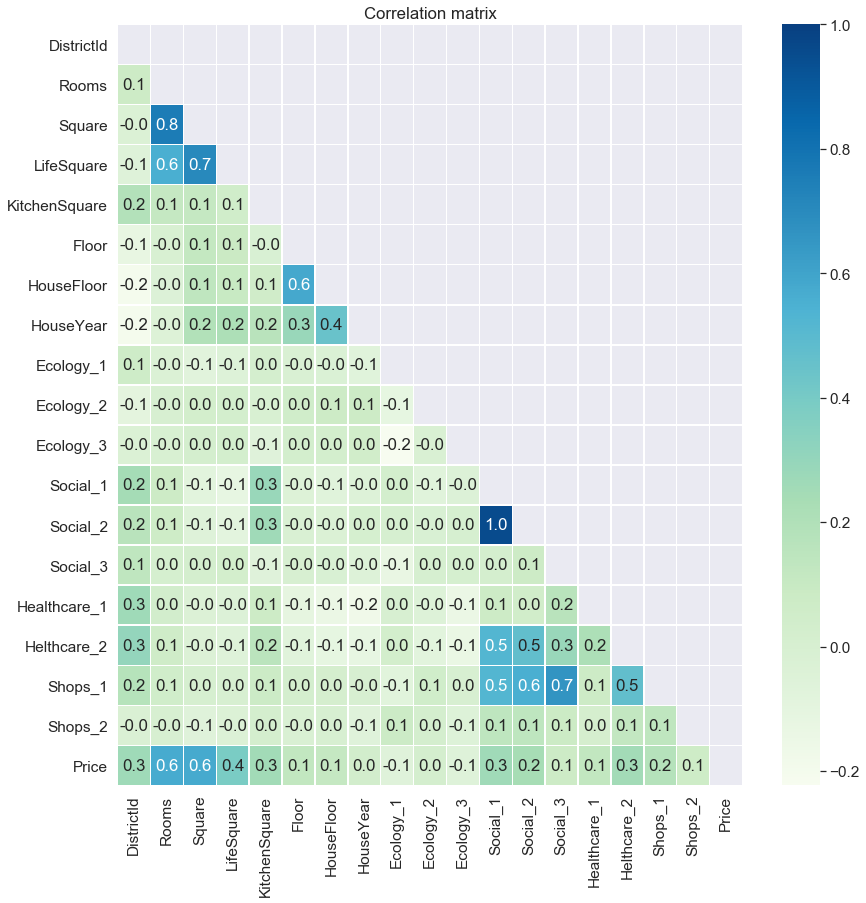

In [197]:
import seaborn as sns
plt.figure(figsize = (14, 14))
mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show();

In [198]:
corr = corr.loc[corr.index=='Price',  corr.columns != 'Price']
corr

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Price,0.2651,0.571638,0.579232,0.388706,0.255675,0.128715,0.113272,0.036606,-0.058381,0.022379,-0.052585,0.263286,0.239226,0.074878,0.128059,0.25309,0.180876,0.070388


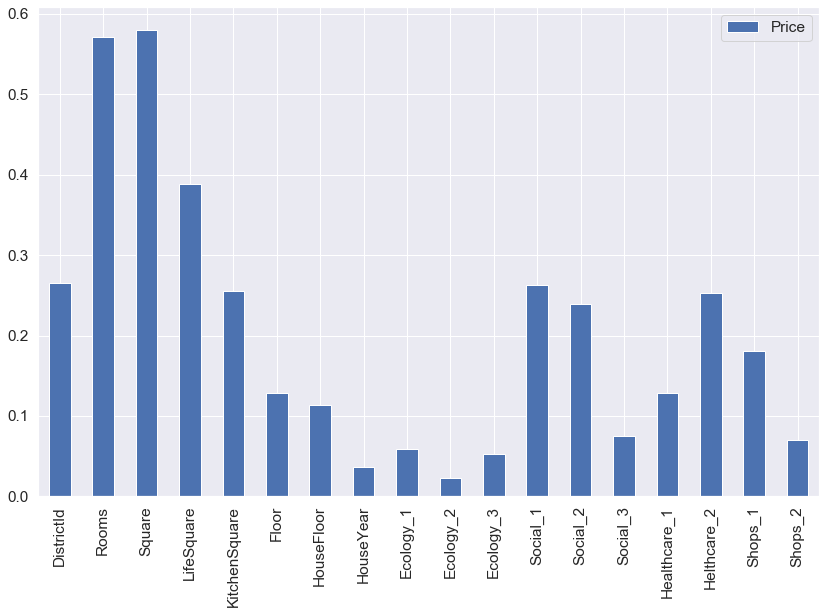

In [199]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9
corr.T.abs().plot(kind='bar')
plt.show()

In [200]:
corr = corr.T.abs()
corr = corr.sort_values('Price', ascending=False)
index_corr = corr.index
index_corr

Index(['Square', 'Rooms', 'LifeSquare', 'DistrictId', 'Social_1',
       'KitchenSquare', 'Helthcare_2', 'Social_2', 'Shops_1', 'Floor',
       'Healthcare_1', 'HouseFloor', 'Social_3', 'Shops_2', 'Ecology_1',
       'Ecology_3', 'HouseYear', 'Ecology_2'],
      dtype='object')

## Построение модели

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

**Random Forest**

In [202]:
index = X_train_scaled.columns

In [203]:
model_RFR = RandomForestRegressor(n_estimators=1000, max_depth=24, random_state=24)
model_RFR.fit(X_train, y_train)
y_pred_RFR_train = model_RFR.predict(X_train)
y_pred_RFR = model_RFR.predict(X_test)
print('train ', r2_score(y_train, y_pred_RFR_train.flatten()))
print('test ', r2_score(y_test, y_pred_RFR.flatten()))

train  0.9624422446335483
test  0.7410649306500627


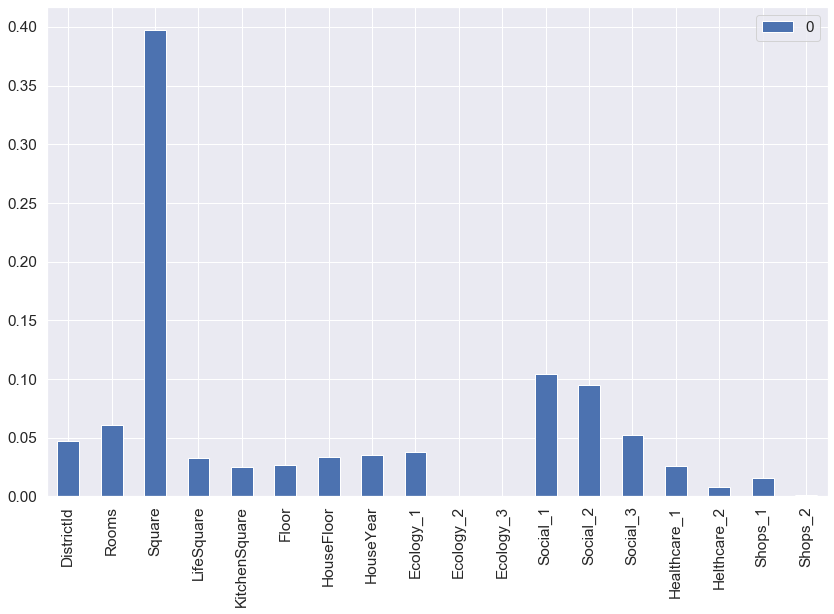

In [204]:
feature_importances = pd.DataFrame(columns=X_train_scaled.columns)
feature_importances.loc[0] = model_RFR.feature_importances_
feature_importances.T.abs().plot(kind='bar')
plt.show()

In [205]:
test_data_id = pd.DataFrame({'Id': test_data_id})

In [206]:
result = pd.DataFrame(model_RFR.predict(test_data), columns=['Price'])
result.head(10)

,Price
0,162743.729685
1,224267.250933
2,190428.165765
3,361442.557086
4,140777.238619
5,214811.758042
6,180229.659982
7,228421.740701
8,296624.351687
9,208831.769398


In [207]:
result[test_data_id.columns] = test_data_id
result = result[['Id', 'Price']]
result.head(10)

,Id,Price
0,725,162743.729685
1,15856,224267.250933
2,5480,190428.165765
3,15664,361442.557086
4,14275,140777.238619
5,7633,214811.758042
6,13329,180229.659982
7,5502,228421.740701
8,4220,296624.351687
9,11538,208831.769398


In [208]:
result.to_csv('AGChernyshenko_predictions.csv', index=False, encoding='utf-8', header=True)